In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
buoy = 132
SWF="SWFLANT"
website = "CDIP"
max_wave_fn = "data/{}_open_waters_buoy{}_max_sig_wave_height_{}.csv".format(SWF, buoy, website)
df = pd.read_csv(max_wave_fn,index_col=0)
df.index = pd.to_datetime(df.index)
df

In [9]:
buoy = 41112
# buoy = 41008
SWF="SWFLANT"
website = "NDBC"
max_wave_fn = "data/{}_open_waters_buoy{}_max_sig_wave_height_{}.csv".format(SWF, buoy, website)
df = pd.read_csv(max_wave_fn,index_col=0)
df.index = pd.to_datetime(df.index)
df

,wave_height_(m),sea_state
2006-03-01,0.60,3.0
2006-03-02,0.60,3.0
2006-03-03,0.50,3.0
2006-03-04,1.90,4.0
2006-03-05,1.00,3.0
...,...,...
2019-12-27,1.32,4.0
2019-12-28,1.17,3.0
2019-12-29,1.16,3.0
2019-12-30,1.29,4.0


In [10]:
df.describe()

,wave_height_(m),sea_state
count,4906.000000,4906.000000
mean,1.143520,3.322870
std,0.522321,0.562971
min,0.100000,2.000000
25%,0.800000,3.000000
50%,1.010000,3.000000
75%,1.360000,4.000000
max,6.390000,6.000000


In [11]:
df['Month'] = df.index.month_name().str.slice(0,3)
df

,wave_height_(m),sea_state,Month
2006-03-01,0.60,3.0,Mar
2006-03-02,0.60,3.0,Mar
2006-03-03,0.50,3.0,Mar
2006-03-04,1.90,4.0,Mar
2006-03-05,1.00,3.0,Mar
...,...,...,...
2019-12-27,1.32,4.0,Dec
2019-12-28,1.17,3.0,Dec
2019-12-29,1.16,3.0,Dec
2019-12-30,1.29,4.0,Dec


In [19]:
df_2020['Month'] = df_2020.index.month_name().str.slice(0,3) + "132"
df_2020

,wave_height_(m),sea_state,Month
date_time,,,
2006-02-09,0.95,3.0,Feb132
2006-02-10,0.75,3.0,Feb132
2006-02-11,1.26,4.0,Feb132
2006-02-12,1.09,3.0,Feb132
2006-02-13,0.65,3.0,Feb132
...,...,...,...
2020-07-03,0.54,3.0,Jul132
2020-07-04,0.53,3.0,Jul132
2020-07-05,0.71,3.0,Jul132


In [20]:
# for select months
months_for_comparison = ['Apr2020', 'May2020', 'Apr', 'May']
df_months_comparison = df.loc[df["Month"].isin(months_for_comparison)]
df_months_comparison_2020 = df_2020.loc[df_2020["Month"].isin(months_for_comparison)]
df_months_comparison = pd.concat([df_months_comparison, df_months_comparison_2020])
print(df_months_comparison.head())
print(f_months_comparison.shape)
print(df_months_comparison_2020.shape)

,wave_height_(m),sea_state,Month
date_time,,,
2005-04-01,0.524256,3.0,Apr
2005-04-02,0.396240,2.0,Apr
2005-04-03,0.780288,3.0,Apr
2005-04-04,0.259080,2.0,Apr
2005-04-05,0.594360,3.0,Apr
...,...,...,...
2020-05-27,1.020000,3.0,2020May
2020-05-28,0.640000,3.0,2020May
2020-05-29,2.190000,4.0,2020May


In [20]:
# for all months
list_of_months_to_drop = ["Dec", "Feb", "Jan", "Mar", "Nov"]
df_filtered = df[~df["Month"].isin(list_of_months_to_drop)]
df_months_comparison = pd.concat([df_filtered, df_2020])
df_months_comparison_sorted = df_months_comparison.sort_values(by=["Month"])
df_months_comparison

,wave_height_(m),sea_state,Month
date_time,,,
2004-07-01,0.134112,2.0,Jul
2004-07-02,2.033016,4.0,Jul
2004-07-03,0.292608,2.0,Jul
2004-07-04,0.332232,2.0,Jul
2004-07-05,0.280416,2.0,Jul
...,...,...,...
2020-10-02,0.870000,3.0,Oct2020
2020-10-03,0.780000,3.0,Oct2020
2020-10-04,0.670000,3.0,Oct2020


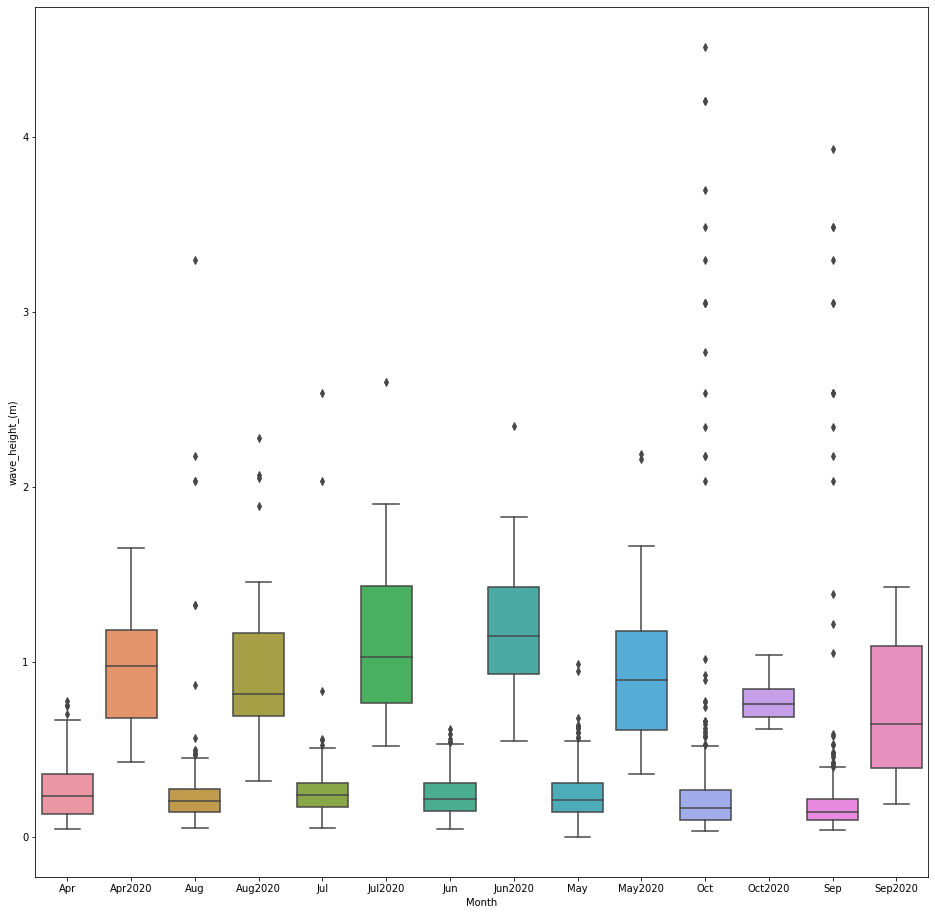

In [21]:
box_whisker_fn = "figures/SWFPAC_buoy{}_wave_height.png".format("combined_comparison")
y = "wave_height_(m)"
x = "Month"
plt.figure(figsize=(16,16,))
ax = sns.boxplot(x=x, y=y, data=df_months_comparison_sorted)
# ax = sns.swarmplot(x=x, y=y, data=df, color='grey') 
plt.savefig(box_whisker_fn, dpi=600)

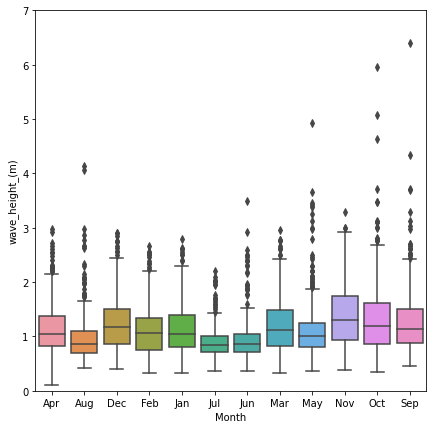

In [12]:
box_whisker_fn = "figures/SWFLANT_buoy{}_wave_height.png".format(41112)
# box_whisker_fn = "figures/SWFLANT_buoy{}_wave_height.png".format(41008)
y = "wave_height_(m)"
x = "Month"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x=x, y=y, data=df.sort_values(by=["Month"]))
ax.set(ylim=(0, 7))
# ax = sns.swarmplot(x=x, y=y, data=df, color='grey') 
plt.savefig(box_whisker_fn, dpi=600)

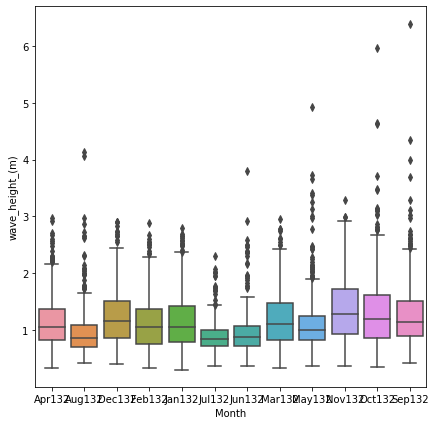

In [20]:
box_whisker_fn = "figures/SWFPAC_buoy{}_wave_height.png".format(132)
y = "wave_height_(m)"
x = "Month"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x=x, y=y, data=df_2020.sort_values(by=["Month"]))
# ax = sns.swarmplot(x=x, y=y, data=df, color='grey') 
plt.savefig(box_whisker_fn, dpi=600)